In [12]:
%matplotlib widget
import importlib
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("..")       # to make the upper folder visible
import src
_ = importlib.reload(src)   # this make changes in the src package immediately effective without restarting the kernel

# folder path
dirPath = "../data/raw/1st_test_IMSBearing/"
fileName = "2003.10.22.12.06.24"

snap1=src.data.snapshot()
snap1.readImsFile(path=dirPath+fileName)

,time,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y
0,0.000000,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,0.000049,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,0.000098,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,0.000146,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,0.000195,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...,...
20475,0.999805,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.999854,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,0.999902,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,0.999951,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


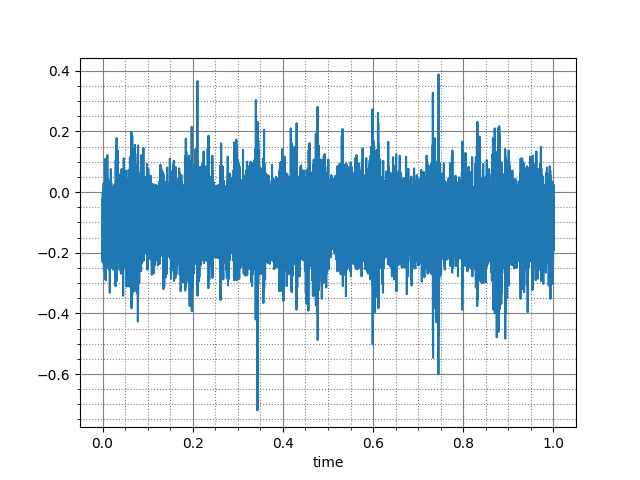

In [13]:
ax=snap1.rawData.plot(x='time',y='Bearing 1 x',legend=False)
ax.grid(which='major',axis='both',color='grey', linestyle='-')
ax.grid(which='minor',axis='both',color='grey', linestyle=':')
ax.minorticks_on()